In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train_V2.csv")

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
gr_ma = train.groupby(['groupId', 'matchId']).Id.agg('count')
gr_ma

groupId         matchId       
00000c08b5be36  660d439a723670    3
00000d1cbbc340  370b420efc87f4    1
000025a09dd1d7  7c86ac34f9ea9c    1
000038ec4dff53  77a20700ee0c75    3
00003a54230763  5ff11bb177a286    2
000049feba5c83  789a6f3b30fb8b    3
00006aa800b4a7  ea1e8b84979c8f    1
00006eda19d504  d7cfa3f92b5c47    1
000073397f671b  77b1eca53a5eb4    3
000077d5217a7c  5b054e6d1adb85    2
0000909041d5c1  c160b31827619c    1
00009c612cb5dc  c5e30ae669ac6b    2
00009db03ac5d7  5fbfcd03b016fd    2
0000a174c5bcf4  a0fe6bf07498c6    1
0000a5dcdbfc5a  6956d9c47e9631    1
0000a728ee2c53  5f74d639efdd47    1
0000a9f58703c5  1c30f88fc6b972    3
0000b3a8f7db43  37714fcfd3476f    3
0000bfc2544072  f9263855a0ea4e    1
0000c5fb49ea02  360bf7d2eaf4b5    1
0000c607971e90  1226be2188d580    1
0000c9b94f8adc  453e4e905d4718    1
0000cad2da707b  957103075e11cb    3
0000d43b2c00bb  3662dcf3e62ea3    4
0000e5e6361fdd  4c0beed625fd7d    2
0000e8d6b8e3f6  6590189bb1b6ea    4
000101f86a3d75  05d98a8c3b007b   

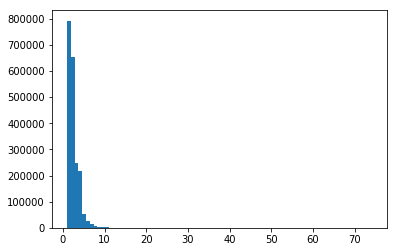

In [25]:
plt.hist(train.groupby(['groupId', 'matchId']).Id.agg('count'), bins = 80)
plt.show()

In [21]:
np.sort(train.groupby(['groupId', 'matchId']).Id.agg('count'))[::-1]

array([74, 72, 64, ...,  1,  1,  1], dtype=int64)

In [23]:
train.groupby(['groupId', 'matchId']).Id.agg('count').quantile(.95)

5.0

In [9]:
quant = gr_ma[gr_ma <= gr_ma.quantile(.95)]
quant

groupId         matchId       
00000c08b5be36  660d439a723670    3
00000d1cbbc340  370b420efc87f4    1
000025a09dd1d7  7c86ac34f9ea9c    1
000038ec4dff53  77a20700ee0c75    3
00003a54230763  5ff11bb177a286    2
000049feba5c83  789a6f3b30fb8b    3
00006aa800b4a7  ea1e8b84979c8f    1
00006eda19d504  d7cfa3f92b5c47    1
000073397f671b  77b1eca53a5eb4    3
000077d5217a7c  5b054e6d1adb85    2
0000909041d5c1  c160b31827619c    1
00009c612cb5dc  c5e30ae669ac6b    2
00009db03ac5d7  5fbfcd03b016fd    2
0000a174c5bcf4  a0fe6bf07498c6    1
0000a5dcdbfc5a  6956d9c47e9631    1
0000a728ee2c53  5f74d639efdd47    1
0000a9f58703c5  1c30f88fc6b972    3
0000b3a8f7db43  37714fcfd3476f    3
0000bfc2544072  f9263855a0ea4e    1
0000c5fb49ea02  360bf7d2eaf4b5    1
0000c607971e90  1226be2188d580    1
0000c9b94f8adc  453e4e905d4718    1
0000cad2da707b  957103075e11cb    3
0000d43b2c00bb  3662dcf3e62ea3    4
0000e5e6361fdd  4c0beed625fd7d    2
0000e8d6b8e3f6  6590189bb1b6ea    4
000101f86a3d75  05d98a8c3b007b   

In [14]:
train = train[train.groupId.isin(quant.to_frame().index.get_level_values(0))
              & train.matchId.isin(quant.to_frame().index.get_level_values(1))]

In [15]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
